# <h1 style="text-align:center; color:blue;">Regression algorithms part 1</h1>

- Regression problems are a type of supervised machine learning task where the goal is to predict a continuous numerical value based on input features. In regression, the output variable is quantitative, such as predicting house prices, temperatures, or sales amounts. Unlike classification, which predicts discrete labels, regression models estimate real-valued outcomes and are evaluated using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).


!["Regression"](https://media.geeksforgeeks.org/wp-content/uploads/20231018110652/Regression-Line-copy.webp)

- After selecting a regression algorithm, the next steps involve training the model and evaluating its performance. 
- Training the model means fitting it to the available data so it can learn the relationship between input features and the target variable.
- Once trained, the model's predictions are compared to actual values using evaluation metrics such as R2 Score (R2) or Mean Squared Error (MSE) or Mean Absolute Error (MAE).
- This evaluation helps determine how well the model generalizes to new, unseen data and guides further improvements.


### Common regression algorithms include:
- Linear Regression
- Polynomial Regression
- SGD Regression
- Ridge Regression
- Lasso Regression
- Elastic Net Regression
- Support Vector Regression (SVR)
- Decision Tree Regression
- Random Forest Regression
- K-Nearest Neighbors Regression (KNN Regression)
- Bayesian Regression
- Gradient Boosting Regression (e.g., XGBoost, LightGBM, CatBoost)
- Neural Network Regression (Deep Learning)

**Each algorithm has its own strengths and is suitable for different types of regression problems.**


In [44]:
import numpy as np
import numpy.typing as npt
import pandas as pd


# 1. Generate synthetic regression dataset with both numerical and categorical features
np.random.seed(42)
n_samples: int = 500

# Numerical features
age: npt.NDArray[np.int64] = np.random.randint(18, 70, size=n_samples)
salary: npt.NDArray[np.int64] = np.random.normal(50000, 15000, size=n_samples)
experience: npt.NDArray[np.int64] = np.random.randint(0, 40, size=n_samples)

# Categorical features
departments: npt.NDArray[np.str_] = np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], size=n_samples)
education: npt.NDArray[np.str_] = np.random.choice(['Bachelors', 'Masters', 'PhD'], size=n_samples)

# Target variable (continuous)
target: npt.NDArray[np.float64] = (
    20000 + age * 150 + experience * 300 +
    (departments == 'Engineering') * 10000 +
    (education == 'PhD') * 5000 +
    np.random.normal(0, 5000, size=n_samples)
)

# Create DataFrame
df: pd.DataFrame = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Experience': experience,
    'Department': departments,
    'Education': education,
    'Target': target
})

df.head()

,Age,Salary,Experience,Department,Education,Target
0,56,81832.342955,38,Engineering,Masters,48667.579506
1,69,65486.978908,39,Sales,PhD,42252.803816
2,46,27209.450511,34,Sales,Masters,35238.966120
3,32,42736.488907,33,Sales,Masters,40143.743099
4,60,69003.667238,23,Engineering,Bachelors,55322.931530


In [45]:
# 2. Check for NaN values
print("NaN values in each column:\n", df.isnull().sum())


NaN values in each column:
 Age           0
Salary        0
Experience    0
Department    0
Education     0
Target        0
dtype: int64


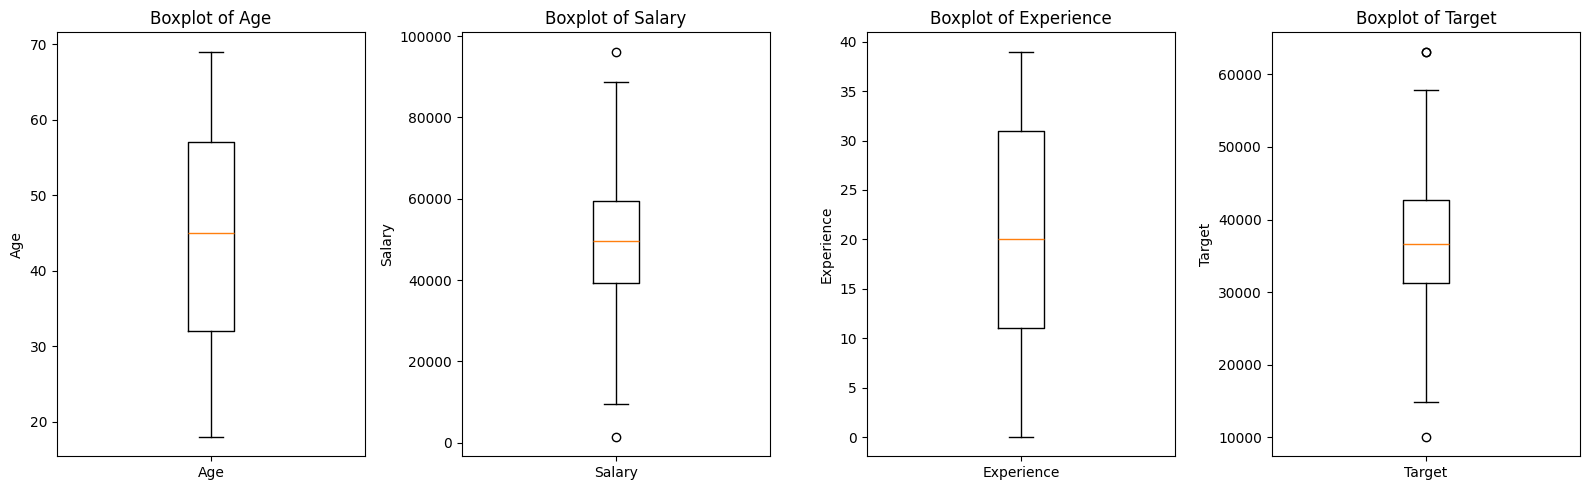

In [46]:
# 3.1 Outlier detection (using boxplot)

import matplotlib.pyplot as plt

features: list[str] = ['Age', 'Salary', 'Experience', 'Target']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(16, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature])
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
# 3.2 Outlier removal (using IQR for numerical columns)
def remove_outliers_iqr(data: pd.DataFrame,
                        column: str) -> pd.DataFrame:
    Q1: float = data[column].quantile(0.25)
    Q3: float = data[column].quantile(0.75)
    IQR: float = Q3 - Q1
    not_outliers: pd.DataFrame = data[(data[column] > (Q1 - 1.5 * IQR)) & (data[column] < (Q3 + 1.5 * IQR))]
    return not_outliers


In [48]:
outliers_cols: list[str] = ['Salary', 'Target']

for col in outliers_cols:
    df = remove_outliers_iqr(df, col)



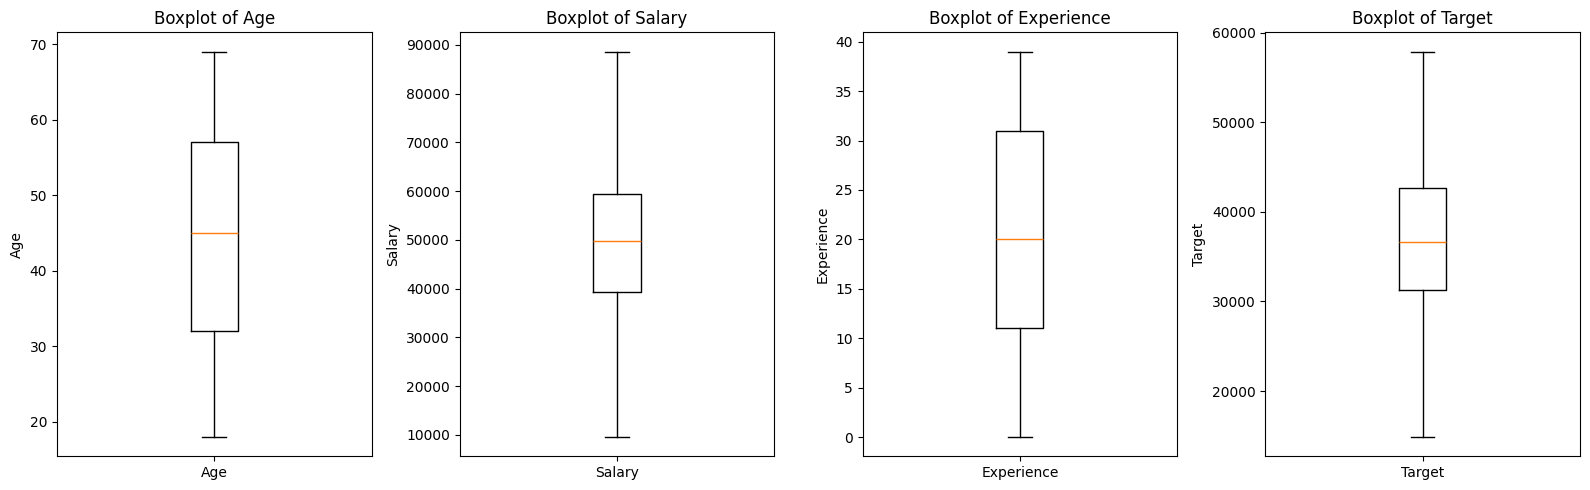

In [49]:
# Check

features: list[str] = ['Age', 'Salary', 'Experience', 'Target']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(16, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature])
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [50]:
# 4. Encode categorical data and scale numerical features

# Splitting categorical and numerical
categorical_df: pd.DataFrame = df.select_dtypes('object')
numerical_df: pd.DataFrame = df.select_dtypes('number')

# Getting the corresponding columns
categorical_cols: list[str] = categorical_df.columns.to_list()
numerical_cols: list[str] = numerical_df.columns.to_list()

# Importing the functions
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding
le: LabelEncoder = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scaling
scaler: StandardScaler = StandardScaler()

for col in numerical_cols:
    df[[col]] = scaler.fit_transform(df[[col]])

df.head()

,Age,Salary,Experience,Department,Education,Target
0,0.785215,2.202647,1.569067,0,1,1.484245
1,1.653403,1.086735,1.657397,3,2,0.679555
2,0.117377,-1.526504,1.215746,3,1,-0.200284
3,-0.817595,-0.466460,1.127415,3,1,0.414987
4,1.052350,1.326823,0.244113,0,0,2.319114


In [51]:
# 5. Split the data into train and test sets

# Importing the function
from sklearn.model_selection import train_test_split

# Getting X and y

X: pd.DataFrame = df.drop('Target', axis=1)
y: pd.Series = df['Target']

# Splitting
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (396, 5)
Shape of X_test: (99, 5)
Shape of y_train: (396,)
Shape of y_test: (99,)


- In this section, we will focus on model training and evaluation.
- We'll define a function that will train a regression model, then print its accuracy and error metrics.


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
import numpy as np
from typing import Union

In [56]:
def train_and_evaluate(model: BaseEstimator,
                       X_train: pd.DataFrame,
                       y_train: pd.Series,
                       X_test: pd.DataFrame,
                       y_test: pd.Series) -> dict[str, Union[float, np.float64]]:
    """
    Trains the given regression model and returns accuracy (R^2) and error (RMSE) for both train and test sets.
    """

    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred: npt.NDArray[np.float64] = model.predict(X_train)
    y_test_pred: npt.NDArray[np.float64] = model.predict(X_test)
    
    # Accuracy (R^2)
    train_r2: float = model.score(X_train, y_train)
    test_r2: float = model.score(X_test, y_test)
    
    # Error (RMSE)
    train_rmse: np.float64 = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse: np.float64 = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results: dict[str, Union[float, np.float64]] = {
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse
    }
    return results



### 1- Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

LR: BaseEstimator = LinearRegression()

train_and_evaluate(model= LR,
                   X_train= X_train,
                   y_train= y_train,
                   X_test= X_test,
                   y_test= y_test
                   )


{'train_r2': 0.5064758857636442,
 'test_r2': 0.43477786580641187,
 'train_rmse': np.float64(0.7109626598471702),
 'test_rmse': np.float64(0.7114399512491825)}

**Note the bad model matrics**

**Fixing is not in the course content**

### 2- SGD Regression

In [58]:
from sklearn.linear_model import SGDRegressor

SGD: BaseEstimator = SGDRegressor()

train_and_evaluate(model= SGD,
                   X_train= X_train,
                   y_train= y_train,
                   X_test= X_test,
                   y_test= y_test
                   )


{'train_r2': 0.5041785369778011,
 'test_r2': 0.4404229239837245,
 'train_rmse': np.float64(0.712615499886414),
 'test_rmse': np.float64(0.7078783445502113)}

### 3- Ridge Regression

In [59]:
from sklearn.linear_model import Ridge

ridge: BaseEstimator = Ridge()

train_and_evaluate(model= ridge,
                   X_train= X_train,
                   y_train= y_train,
                   X_test= X_test,
                   y_test= y_test
                   )


{'train_r2': 0.5064723877727002,
 'test_r2': 0.43503479487372,
 'train_rmse': np.float64(0.7109651794165966),
 'test_rmse': np.float64(0.7112782357313967)}

### 4- Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

lasso: BaseEstimator = Lasso()

train_and_evaluate(model= lasso,
                   X_train= X_train,
                   y_train= y_train,
                   X_test= X_test,
                   y_test= y_test
                   )


{'train_r2': 0.0,
 'test_r2': -0.010766416402890444,
 'train_rmse': np.float64(1.0120281740488402),
 'test_rmse': np.float64(0.9513801176534722)}

### 5- ElasticNet Regression

In [61]:
from sklearn.linear_model import ElasticNet

EN: BaseEstimator = ElasticNet()

train_and_evaluate(model= EN,
                   X_train= X_train,
                   y_train= y_train,
                   X_test= X_test,
                   y_test= y_test
                   )


{'train_r2': 0.02274256192437918,
 'test_r2': 0.00421275564041057,
 'train_rmse': np.float64(1.0004539318894166),
 'test_rmse': np.float64(0.9443042595285438)}